<a href="https://colab.research.google.com/github/daliarod96/kurt-vile-spotify-api-data-mining/blob/main/kurt_vile_spotify_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/keys.py' .

In [ ]:
# import necessary libraries
import keys
import requests
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
cid = keys.clientID
secret = keys.clientSecret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

# Access Spotify
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# Kurt Vile's URI
kurtvile_uri = 'spotify:artist:5gspAQIAH8nJUrMYgXjCJ2'

In [ ]:
# gather album names, URIs, and the number of tracks in each album 
results = spotify.artist_albums(kurtvile_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

# this is the info I want to extract from Spotify    
album_names = []
total_tracks = {}
release_date = {}
album_uri = {}

for album in albums:
    if album['name'] not in album_names:
      album_names.append(album['name'])
      total_tracks[album['name']] = album['total_tracks']
      release_date[album['name']] = album['release_date']
      album_uri[album['name']]=album['uri']


In [ ]:
album_uri

{'(watch my moves)': 'spotify:album:0iUKX7bSb68dbhM7sfcNwo',
 'Bottle It In': 'spotify:album:1UVthTEgHP0WcZZxqHtkvL',
 'Lotta Sea Lice': 'spotify:album:6Va3brVieuLkZIjJYf3orN',
 "b'lieve i'm goin down...": 'spotify:album:07W2z9W0uWJPdG8Po0MDiR',
 'Wakin On A Pretty Daze [Deluxe Daze (Post Haze)]': 'spotify:album:6edHbhYQ37CmJY4RYrYczp',
 'Wakin On A Pretty Daze': 'spotify:album:3BSEZLnzVW6QEX12wcKdFi',
 'Smoke Ring For My Halo': 'spotify:album:1y4oIYqNUkzEZNPWncbbAr',
 'Childish Prodigy': 'spotify:album:3TmWAswHIm0Vb08qymeagU',
 'God Is Saying This to You…': 'spotify:album:4QbULk5VUDAzqXMnyOVCkb',
 'Constant Hitmaker': 'spotify:album:5t9zbRAVAyr2yN8mURa7b0'}

In [ ]:
#Remove duplicate albums
album_names.remove('Wakin On A Pretty Daze [Deluxe Daze (Post Haze)]')
album_names.remove('God Is Saying This to You…')
del total_tracks['Wakin On A Pretty Daze [Deluxe Daze (Post Haze)]']
del album_uri['Wakin On A Pretty Daze [Deluxe Daze (Post Haze)]']
del release_date['Wakin On A Pretty Daze [Deluxe Daze (Post Haze)]']
del total_tracks['God Is Saying This to You…']
del album_uri['God Is Saying This to You…']
del release_date['God Is Saying This to You…']

In [ ]:
release_date

{'(watch my moves)': '2022-04-15',
 'Bottle It In': '2018-10-12',
 'Lotta Sea Lice': '2017-10-13',
 "b'lieve i'm goin down...": '2015-09-25',
 'Wakin On A Pretty Daze': '2013-04-08',
 'Smoke Ring For My Halo': '2011-03-07',
 'Childish Prodigy': '2009-10-05',
 'Constant Hitmaker': '2008-03-04'}

In [ ]:
release_date['God Is Saying This to You...'] = '2009-03-03'

In [ ]:
# Gather popularity data for each album
results = spotify.albums(album_uri.values())
popularity = {}
i=0
for album in results['albums']:
  popularity[album_names[i]]=album['popularity']
  i+=1

In [ ]:
popularity

{'(watch my moves)': 52,
 'Bottle It In': 52,
 'Lotta Sea Lice': 43,
 "b'lieve i'm goin down...": 57,
 'Wakin On A Pretty Daze': 51,
 'Smoke Ring For My Halo': 41,
 'Childish Prodigy': 48,
 'Constant Hitmaker': 39}

In [ ]:
# For each album, gather song names and song URIs for further analysis
song_names = {} # key: album name value: list of songs
song_uri = {} # key: song names

for album in album_names:
  songs = []
  results = spotify.album_tracks(album_uri[album])
  
  tracks = results['items']
  while results['next']:
    results = spotify.next(results)
    tracks.extend(results['items'])

  for track in tracks:
    songs.append(track['name'])
    song_uri[track['name']] = track['uri']
  song_names[album] = songs 

# Make a dictionary of song popularities

In [ ]:
song_popularity = {}
for album in album_names:
  for song in song_names[album]:
    results = spotify.track(song_uri[song])
    song_popularity[song] = results['popularity']

# Make dictionary of song duration in seconds

Make dictionaries of audio features per song

In [ ]:
duration = {}
danceability = {}
energy = {}
key = {}
loudness = {}
mode = {}
speechiness = {}
acousticness = {}
instrumentalness = {}
liveness = {}
valence = {}
tempo = {}
time_signature = {}

for album in album_names:
  for song in song_names[album]:
    results = spotify.audio_features(song_uri[song])[0]
    duration[song] = round(results['duration_ms']/60000., 2)
    danceability[song] = results['danceability']
    energy[song] = results['energy']
    key[song] = results['key']
    loudness[song] = results['loudness']
    mode[song] = results['mode']
    speechiness[song] = results['speechiness']
    acousticness[song] = results['acousticness']
    instrumentalness[song] = results['instrumentalness']
    liveness[song] = results['liveness']
    valence[song] = results['valence']
    tempo[song] = results['tempo']
    time_signature[song] = results['time_signature']

In [ ]:
duration['Jesus on a Wire']

5.26

In [ ]:
import sqlite3
connection = sqlite3.connect("kv.db")

In [ ]:
cursor = connection.cursor()

In [ ]:
# I'm going to build a table for the songs
cursor.execute("CREATE TABLE albums (album TEXT PRIMARY KEY, album_popularity INTEGER,total_tracks INTEGER, release_date TEXT)")

In [ ]:
for album in album_names:
  params = (album, popularity[album], total_tracks[album], release_date[album])
  cursor.execute("INSERT INTO albums VALUES (?, ?, ?, ?)", params)

In [ ]:
with connection:
  cursor.execute("SELECT * FROM albums")
  print(cursor.fetchall())

[('(watch my moves)', 52, 15, '2022-04-15'), ('Bottle It In', 52, 13, '2018-10-12'), ('Lotta Sea Lice', 43, 9, '2017-10-13'), ("b'lieve i'm goin down...", 57, 12, '2015-09-25'), ('Wakin On A Pretty Daze', 51, 11, '2013-04-08'), ('Smoke Ring For My Halo', 41, 11, '2011-03-07'), ('Childish Prodigy', 48, 11, '2009-10-05'), ('Constant Hitmaker', 39, 13, '2008-03-04')]


In [ ]:
connection.execute("UPDATE albums SET release_date='2009-03-03' WHERE album = 'God Is Saying This to You...'")

In [ ]:
#connection.execute("DROP TABLE albums")

In [ ]:
# I'm going to build a table for the songs

cursor.execute('''CREATE TABLE songs (song TEXT PRIMARY KEY,
release_date TEXT,
song_popularity INTEGER,
duration INTEGER,
album TEXT,
danceability INTEGER,
energy REAL,
key INTEGER,
loudness REAL,
mode INTEGER,
speechiness REAL,
acousticness REAL,
instrumentalness REAL,
liveness REAL,
valence REAL,
tempo REAL,
time_signature INTEGER,
FOREIGN KEY (album) REFERENCES albums(album)
FOREIGN KEY (release_date) REFERENCES albums(release_date)
 )''')

# select everything except columns song (0) and album (3)

In [ ]:
#cursor.execute("pragma table_info(songs)")
#print(cursor.fetchall())

In [ ]:
for album in album_names:
  for song in song_names[album]:
    params = (song, release_date[album], song_popularity[song], duration[song], album, danceability[song], energy[song], key[song], loudness[song], mode[song], 
              speechiness[song], acousticness[song], instrumentalness[song], liveness[song], valence[song], tempo[song], time_signature[song])
    cursor.execute("INSERT INTO songs VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", params)

In [ ]:
  with connection:
    cursor.execute("SELECT * FROM songs WHERE song=='Loading Zones'")
  print(cursor.fetchall())

[('Loading Zones', '2018-10-12', 52, 3.39, 'Bottle It In', 0.525, 0.846, 4, -4.638, 0, 0.0302, 0.0263, 0.000985, 0.0764, 0.757, 112.22, 4)]


In [ ]:
connection.commit()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

Now we see the popularity of Kurt Vile's albums over time. Popularity is an integer between 0-100 assigned by Spotify. His most popular album is b'lieve i'm goin down... with a popularity of 58. This is followed by Bottle It In and (watch my moves), both holding a popularity score of 52. His later albums, except for Lotta Sea Lice (a mostly covers album in collaboration with Courtney Barnett), fall above the mean popularity and popularity seems to follow an overall increasing trend.



Now I will be moving onto analyzing popularity trends in Kurt Vile's songs.
I will begin by reading my songs table into a dataframe. Such table has a lot of columns, so turning it into a dataframe will make it easier to create visualizations.

In [ ]:
df = pd.read_sql_query("SELECT * FROM songs", connection)

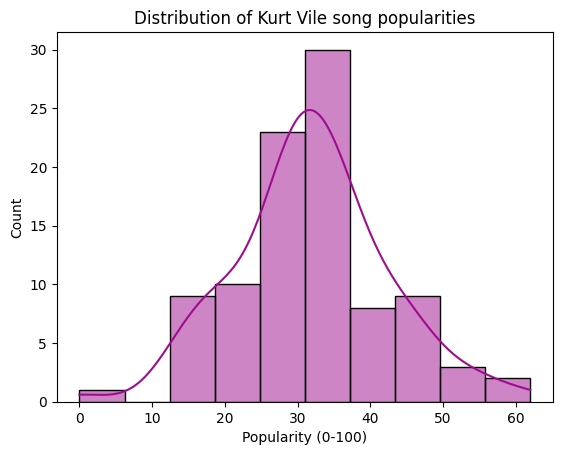

In [ ]:
ax = sns.histplot(df['song_popularity'], kde=True, bins=10, color = '#9E0C8F')
ax.set_title('Distribution of Kurt Vile song popularities')
ax.set_xlabel('Popularity (0-100)')
plt.show()

Kurt Vile's songs are not very popular. Most of his songs have a popularity score below 40. This could be attributed to Kurt Vile releasing his music through independent labels for most of his career (Matador Records for 11 years), thus limiting his exposure to the masses. Furthermore, Kurt Vile does not make pop music. His music could be desribed as a mix of lo-fi, folk, rock, psychedelia, and neo-country. None of these genres are particularly appealing to the mass market. 'Smoke Ring for My Halo,' his fourth studio album, was listed in NME's '500 Greatest Albums of All Time,' so he is a well-respected musician. Therefore, Low popularity does not necessarily mean the music is bad.

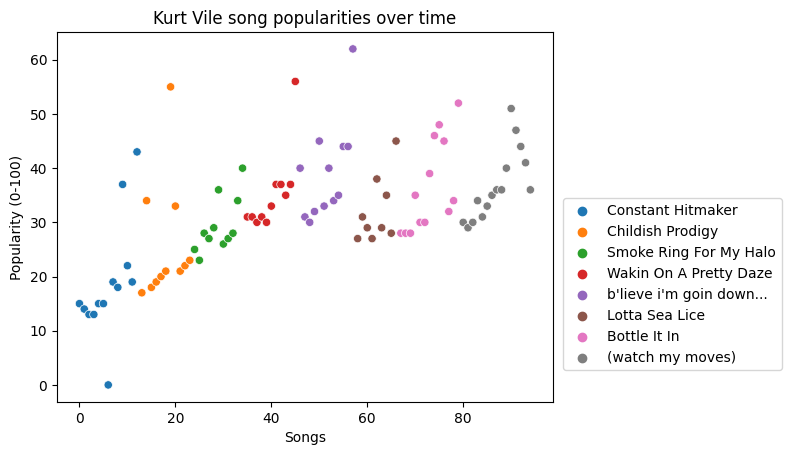

In [ ]:
ax = sns.scatterplot(x=range(0, len(df['song'])), y="song_popularity", data=df.loc[::-1], hue='album')
ax.set_title("Kurt Vile song popularities over time")
ax.set_xlabel("Songs")
ax.set_ylabel("Popularity (0-100)")
ax.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [ ]:
df.head()

,song,release_date,song_popularity,duration,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Goin on a Plane Today,2022-04-15,36,2.50,(watch my moves),0.661,0.234,0,-12.339,1,0.0410,0.9870,0.7930,0.1310,0.221,95.390,4
1,Flyin (like a fast train),2022-04-15,41,4.78,(watch my moves),0.746,0.515,1,-8.196,1,0.0325,0.1770,0.0124,0.0701,0.687,101.488,4
2,Palace of OKV in Reverse,2022-04-15,44,2.90,(watch my moves),0.261,0.582,6,-10.311,1,0.1100,0.3750,0.7830,0.2300,0.399,187.212,4
3,Like Exploding Stones,2022-04-15,47,7.30,(watch my moves),0.473,0.665,0,-8.717,1,0.0240,0.3230,0.0424,0.0947,0.892,95.076,4
4,Mount Airy Hill (Way Gone),2022-04-15,51,5.54,(watch my moves),0.510,0.652,9,-9.404,1,0.0248,0.0234,0.7530,0.1220,0.334,95.534,4


For every track on Spotify,  the API makes available a set of audio features. These are defined as follows: 

* **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **Duration**: The duration of the track in milliseconds.
* **Energy**: A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **Time signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

* **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


Given these audio features, I would like to analyze what it is that: drives the popularity of Kurt Vile's songs. I begin by creating a correlation matrix of Kurt Vile's songs' audio features as quantified by the Spotify API.

In [ ]:
import seaborn as sn

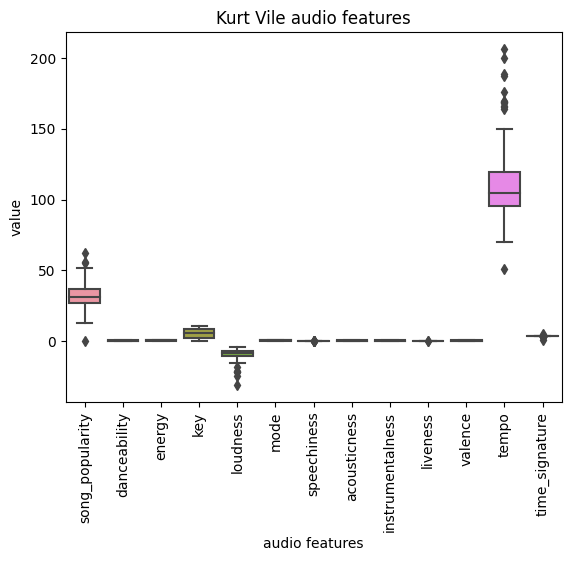

In [ ]:
ax = sns.boxplot(data= df.loc[:, df.columns!= 'duration'], )
ax.set_title("Kurt Vile audio features")
ax.set_xlabel("audio features")
ax.set_ylabel("value")
plt.xticks(rotation=90)
plt.show()

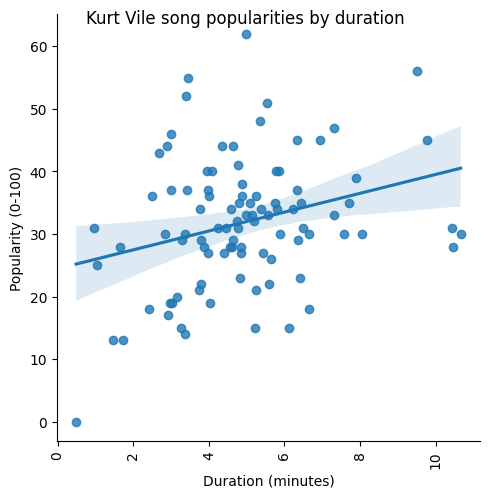

In [ ]:
rp = sns.lmplot(x="duration", y="song_popularity", data=df.loc[::-1])
rp.fig.suptitle('Kurt Vile song popularities by duration')
rp.axes[0,0].set_xlabel('Duration (minutes)')
rp.axes[0,0].set_ylabel('Popularity (0-100)')
plt.xticks(rotation=90)
plt.show()

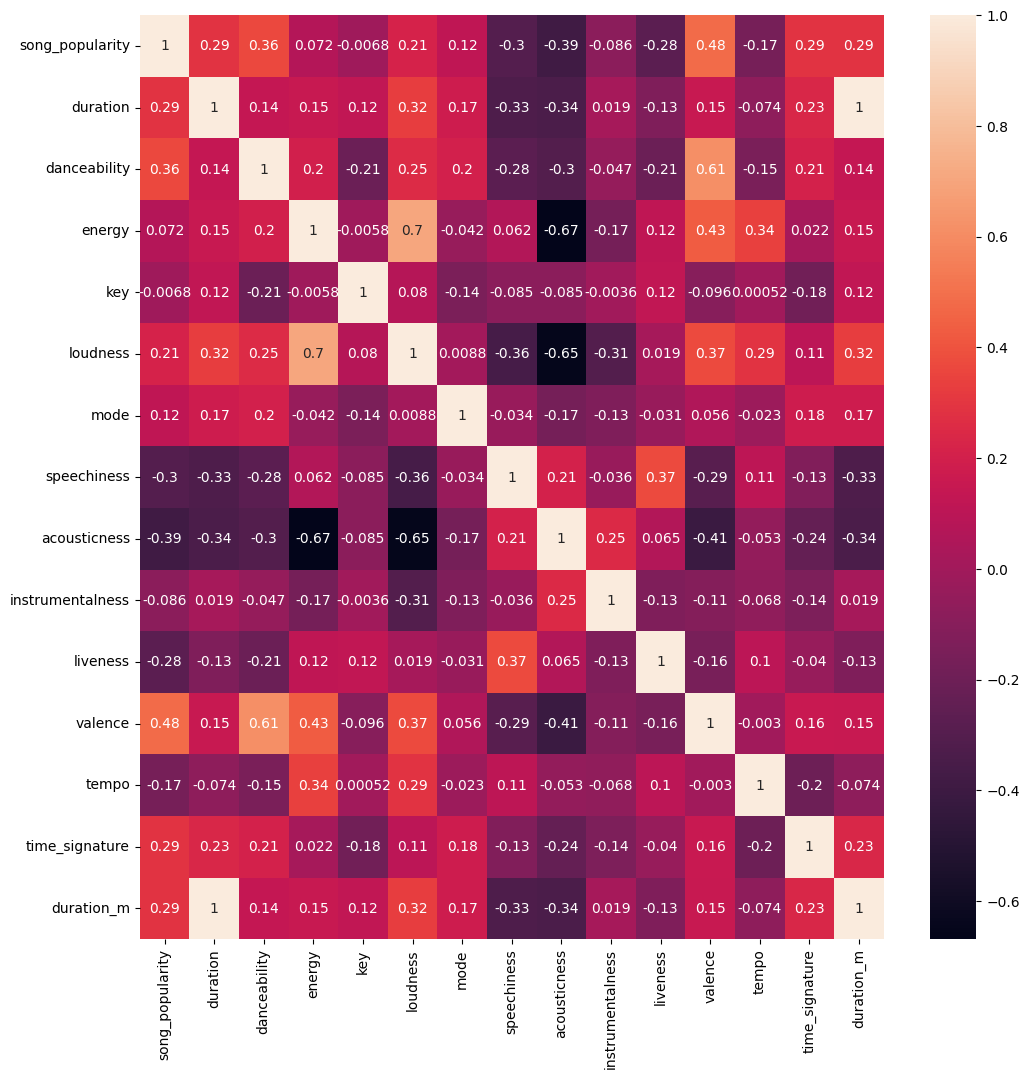

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (12,12))
sn.heatmap(corr_matrix, annot=True)
plt.show()

Duration, danceability, energy, loudness, acousticness, liveness, valence, and time signature are the strongest factors to consider when assessing the popularity of Kurt Vile's music. 